In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Basic statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

## Task 3

C:\Users\venki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 0.9760534694994512
Cluster
2    60
3    60
1    56
0    23
Name: count, dtype: int64
   Cluster  TotalValue  Quantity     Price  Region_Asia  Region_Europe  \
0        0    0.624299  0.736325  0.537565     0.304348       0.130435   
1        1    0.283064  0.269009  0.646664     0.196429       0.250000   
2        2    0.150195  0.224194  0.374812     0.216667       0.283333   
3        3    0.406275  0.499462  0.490493     0.216667       0.266667   

   Region_North America  Region_South America  
0              0.217391              0.347826  
1              0.267857              0.285714  
2              0.233333              0.266667  
3              0.200000              0.316667  


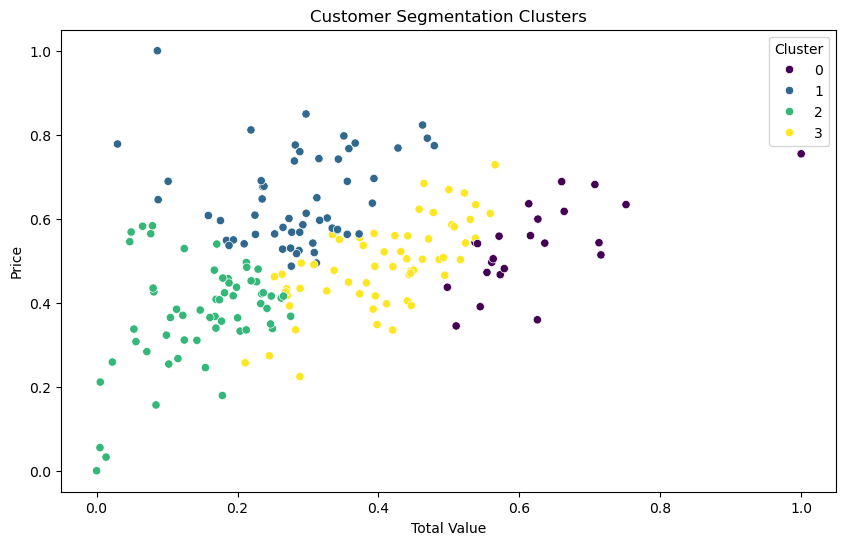

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge transactions with customers
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')

# Create customer profiles
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending by the customer
    'Quantity': 'sum',    # Total quantity purchased by the customer
    'Price': 'mean',      # Average price of products purchased
    'Region': 'first',    # Region of the customer
}).reset_index()

# Perform one-hot encoding for the 'Region' column
customer_profiles = pd.get_dummies(customer_profiles, columns=['Region'], prefix='Region')

# Normalize the data for clustering
scaler = MinMaxScaler()
customer_profiles[['TotalValue', 'Quantity', 'Price']] = scaler.fit_transform(
    customer_profiles[['TotalValue', 'Quantity', 'Price']]
)

# Perform K-Means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(customer_profiles[['TotalValue', 'Quantity', 'Price']])

# Calculate the Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(customer_profiles[['TotalValue', 'Quantity', 'Price']], kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')

# Display the cluster distribution
print(customer_profiles['Cluster'].value_counts())

# Analyze cluster characteristics
# Dynamically get the one-hot encoded region columns
region_columns = [col for col in customer_profiles.columns if col.startswith('Region_')]

cluster_analysis = customer_profiles.groupby('Cluster').agg({
    'TotalValue': 'mean',
    'Quantity': 'mean',
    'Price': 'mean',
    **{col: 'mean' for col in region_columns}  # Include all one-hot encoded region columns
}).reset_index()

print(cluster_analysis)

# Visualize clusters using TotalValue and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_profiles, x='TotalValue', y='Price', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value')
plt.ylabel('Price')
plt.show()